In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from sklearn.utils import shuffle
#import pickle5 as pickle
from sklearn.metrics import multilabel_confusion_matrix as confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.externals import joblib 
from google.colab import drive
from keras.utils.np_utils import to_categorical

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wHUoX_e6np7vcywXWYwNGq3IfZpYzsz06cHdOZEgZFuoufT60AleEk
Mounted at /content/drive


In [ ]:
#Importing the dataset

train_set_x = pd.read_csv(r'/content/drive/My Drive/Model_Datasets/train_traffic_x.csv', header=None)
test_set_x = pd.read_csv('/content/drive/My Drive/Model_Datasets/cropped_dataset.csv')
train_set_y = pd.read_csv(r'/content/drive/My Drive/Model_Datasets/train_traffic_y.csv', header=None)
test_set_y = pd.read_csv('/content/drive/My Drive/Model_Datasets/cropped_label.csv') 
print("Done reading .csv files")

Done reading .csv files


In [ ]:
#Splitting the dataset
X_train = train_set_x.iloc[:,:].values
y_train = train_set_y.iloc[:,-1].values

In [ ]:
# Only to use for importing test_traffix_x.csv and test_traffix_y.csv
test_dataset_y = pd.read_csv('/content/drive/My Drive/Model_Datasets/test_traffic_y.csv')
test_dataset_x = pd.read_csv('/content/drive/My Drive/Model_Datasets/test_traffic_x.csv') 
X_dataset_test = test_dataset_x.iloc[:,:].values
y_dataset_test = test_dataset_y.iloc[:,-1].values
X_dataset_test = X_dataset_test.reshape(X_dataset_test.shape[0], 32, 32, 3)
y_dataset_test = y_dataset_test.reshape(y_dataset_test.shape[0], 1)
Y_dataset_test = to_categorical( y_dataset_test, num_classes = 43)

In [ ]:
#Only to use when all_dataset.csv and all_label.csv is used
X_test = test_set_x.to_numpy()
y_test = test_set_y.to_numpy()

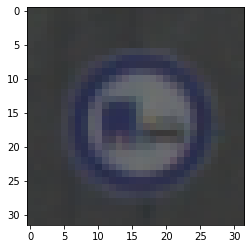

In [ ]:
#Shaping X data and converting Y data to a one hot vector

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
X_train, y_train = shuffle(X_train, y_train, random_state=0)
plt.imshow(X_train[223])
plt.show()

In [ ]:
print(X_dataset_test.shape)
print(Y_dataset_test.shape)

(12629, 32, 32, 3)
(12629, 43)


In [ ]:
#parameters specification
batch_size = 32
num_classes = 43
epochs = 50
img_size = 32

In [ ]:
#One hot encoding

Y_train = to_categorical( y_train, num_classes = 43)
Y_test = to_categorical( y_test, num_classes = 43)

In [ ]:
#Developing the CNN model
print("Devoloping a model")

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(6, kernel_size = (5, 5), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(16, kernel_size = (5,5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

print("Model Developed")

Devoloping a model
Model Developed


In [ ]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 6)         24        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 5, 16)          64        
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)              

In [ ]:
#Compilation

import keras
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta

opt = tf.keras.optimizers.Adagrad(lr=0.03)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

#model.compile(loss='categorical_crossentropy',
#              optimizer=keras.optimizers.SGD(lr=1e-3, momentum=0.9),
#              metrics=['accuracy'])

#opt = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


history = model.fit(X_train, Y_train, batch_size=128, 
          epochs=50, verbose=1,validation_split=0.1)

print("................TRAINING DONE....................")

Epoch 1/50
276/276 [==============================] - 2s 6ms/step - loss: 0.9844 - accuracy: 0.7508 - val_loss: 0.3026 - val_accuracy: 0.9278
Epoch 2/50
276/276 [==============================] - 1s 5ms/step - loss: 0.1810 - accuracy: 0.9586 - val_loss: 0.1497 - val_accuracy: 0.9617
Epoch 3/50
276/276 [==============================] - 1s 5ms/step - loss: 0.0969 - accuracy: 0.9785 - val_loss: 0.0921 - val_accuracy: 0.9773
Epoch 4/50
276/276 [==============================] - 1s 5ms/step - loss: 0.0633 - accuracy: 0.9875 - val_loss: 0.0699 - val_accuracy: 0.9827
Epoch 5/50
276/276 [==============================] - 1s 5ms/step - loss: 0.0451 - accuracy: 0.9914 - val_loss: 0.0636 - val_accuracy: 0.9847
Epoch 6/50
276/276 [==============================] - 1s 5ms/step - loss: 0.0337 - accuracy: 0.9937 - val_loss: 0.0569 - val_accuracy: 0.9867
Epoch 7/50
276/276 [==============================] - 1s 5ms/step - loss: 0.0260 - accuracy: 0.9957 - val_loss: 0.0500 - val_accuracy: 0.9890
Epoch 

In [ ]:
#Average Training Accuracy and Loss
history.history['accuracy']
accuracy = np.mean(history.history['accuracy'])
print('The training accuracy is', accuracy*100)
history.history['loss']
loss = np.mean(history.history['loss'])
print('The training loss is', loss)
history.history['val_accuracy']
val_accuracy = np.mean(history.history['val_accuracy'])
print('The validation accuracy is', val_accuracy*100)
history.history['val_loss']
val_loss = np.mean(history.history['val_loss'])
print('The validation loss is', val_loss)

The training accuracy is 99.29114735126495
The training loss is 0.032064337661722675
The validation accuracy is 98.86865544319153
The validation loss is 0.04593556843698025


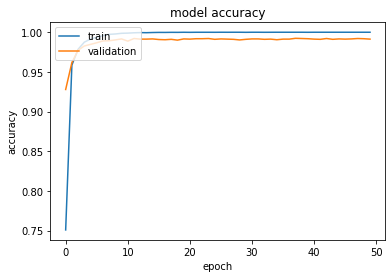

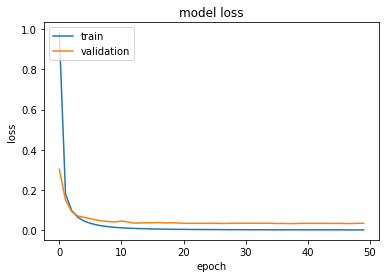

In [ ]:
#plotting the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
target_names = []
for i in range(43):
    a = 'Object '
    b = str(i)
    c = a+b
    c = [i]
    target_names.append((a+b))

def reports(X_test,y_test):
    Y_pred = model.predict(X_test)
    y_pred = np.argmax(Y_pred, axis=1)
    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    score = model.evaluate(X_test, y_test, batch_size=32)
    Test_Loss = score[0]*100
    Test_accuracy = score[1]*100
    kc=cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)
    return classification, confusion, Test_Loss, Test_accuracy ,kc

# Testing Dataset

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,cohen_kappa_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score
classification, confusion, Test_loss, Test_accuracy,kc = reports(X_dataset_test,Y_dataset_test)
classification = str(classification)
confusion_str = str(confusion)

395/395 [==============================] - 1s 3ms/step - loss: 0.3168 - accuracy: 0.9381


In [ ]:
print("confusion matrix: ")
print('{}'.format(confusion_str))
print("KAppa Coeefecient=",kc)
print('Test loss {} (%)'.format(Test_loss))
print('Test accuracy {} (%)'.format(Test_accuracy))
print(classification)

confusion matrix: 
[[ 51   7   0 ...   0   0   0]
 [  0 702   9 ...   0   0   0]
 [  0  22 713 ...   0   0   0]
 ...
 [  0   0   1 ...  82   0   0]
 [  0   0   0 ...   0  48   0]
 [  0   0   1 ...   0   5  82]]
KAppa Coeefecient= 0.9356482281749664
Test loss 31.675615906715393 (%)
Test accuracy 93.80789995193481 (%)
              precision    recall  f1-score   support

    Object 0       0.91      0.85      0.88        60
    Object 1       0.91      0.97      0.94       720
    Object 2       0.94      0.95      0.95       750
    Object 3       0.90      0.95      0.93       450
    Object 4       0.97      0.95      0.96       660
    Object 5       0.90      0.94      0.92       630
    Object 6       1.00      0.78      0.88       150
    Object 7       0.96      0.91      0.93       450
    Object 8       0.92      0.96      0.94       450
    Object 9       0.95      0.93      0.94       480
   Object 10       0.96      0.97      0.96       660
   Object 11       0.92      0.93

Confusion matrix, without normalization


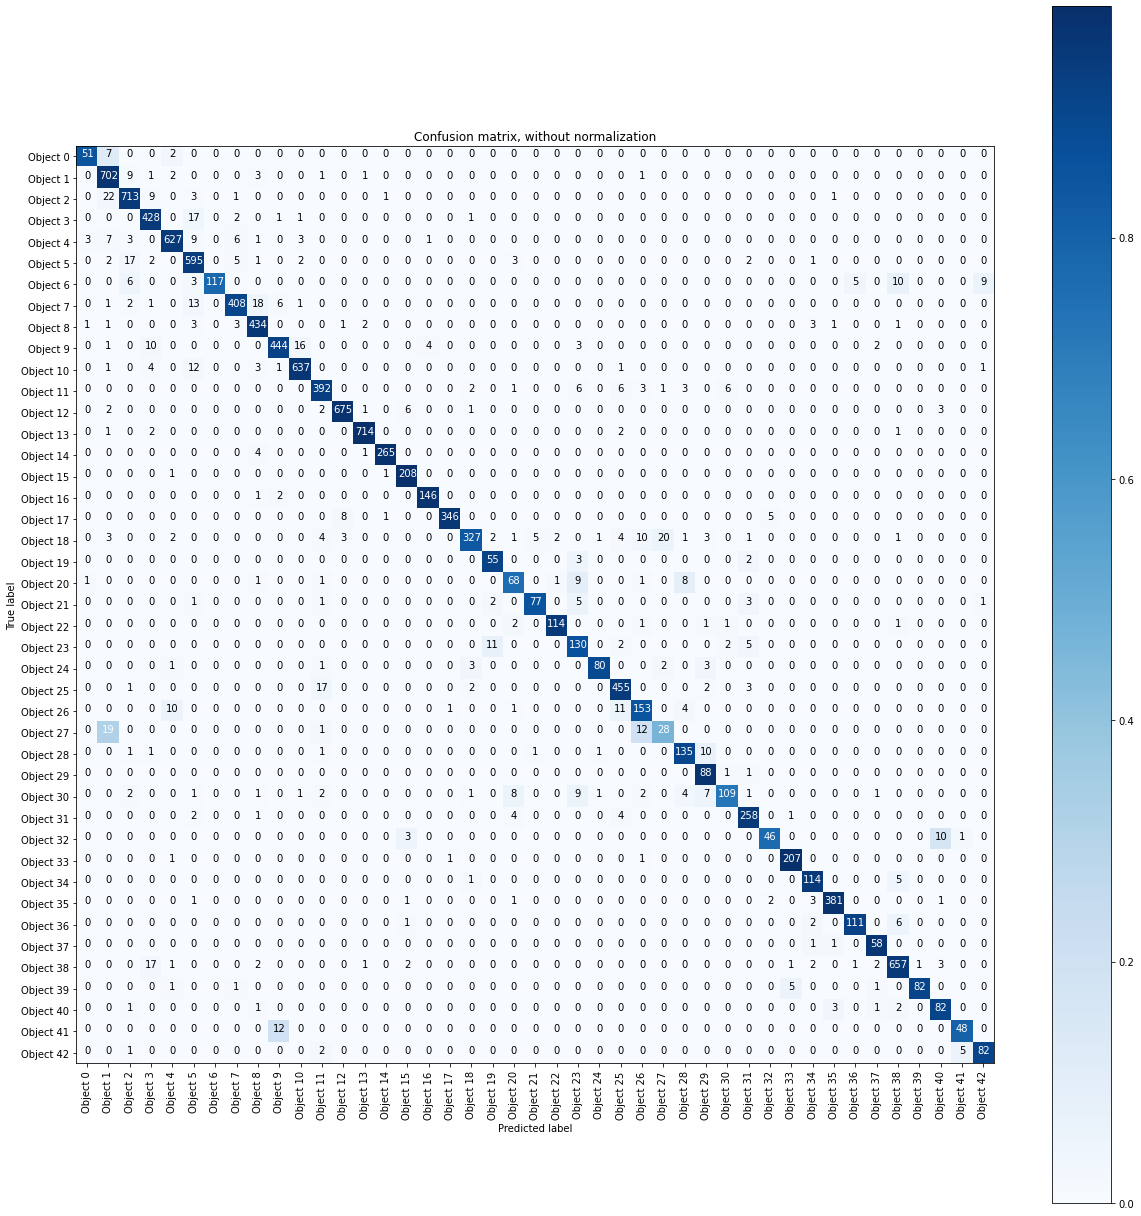

Normalized confusion matrix


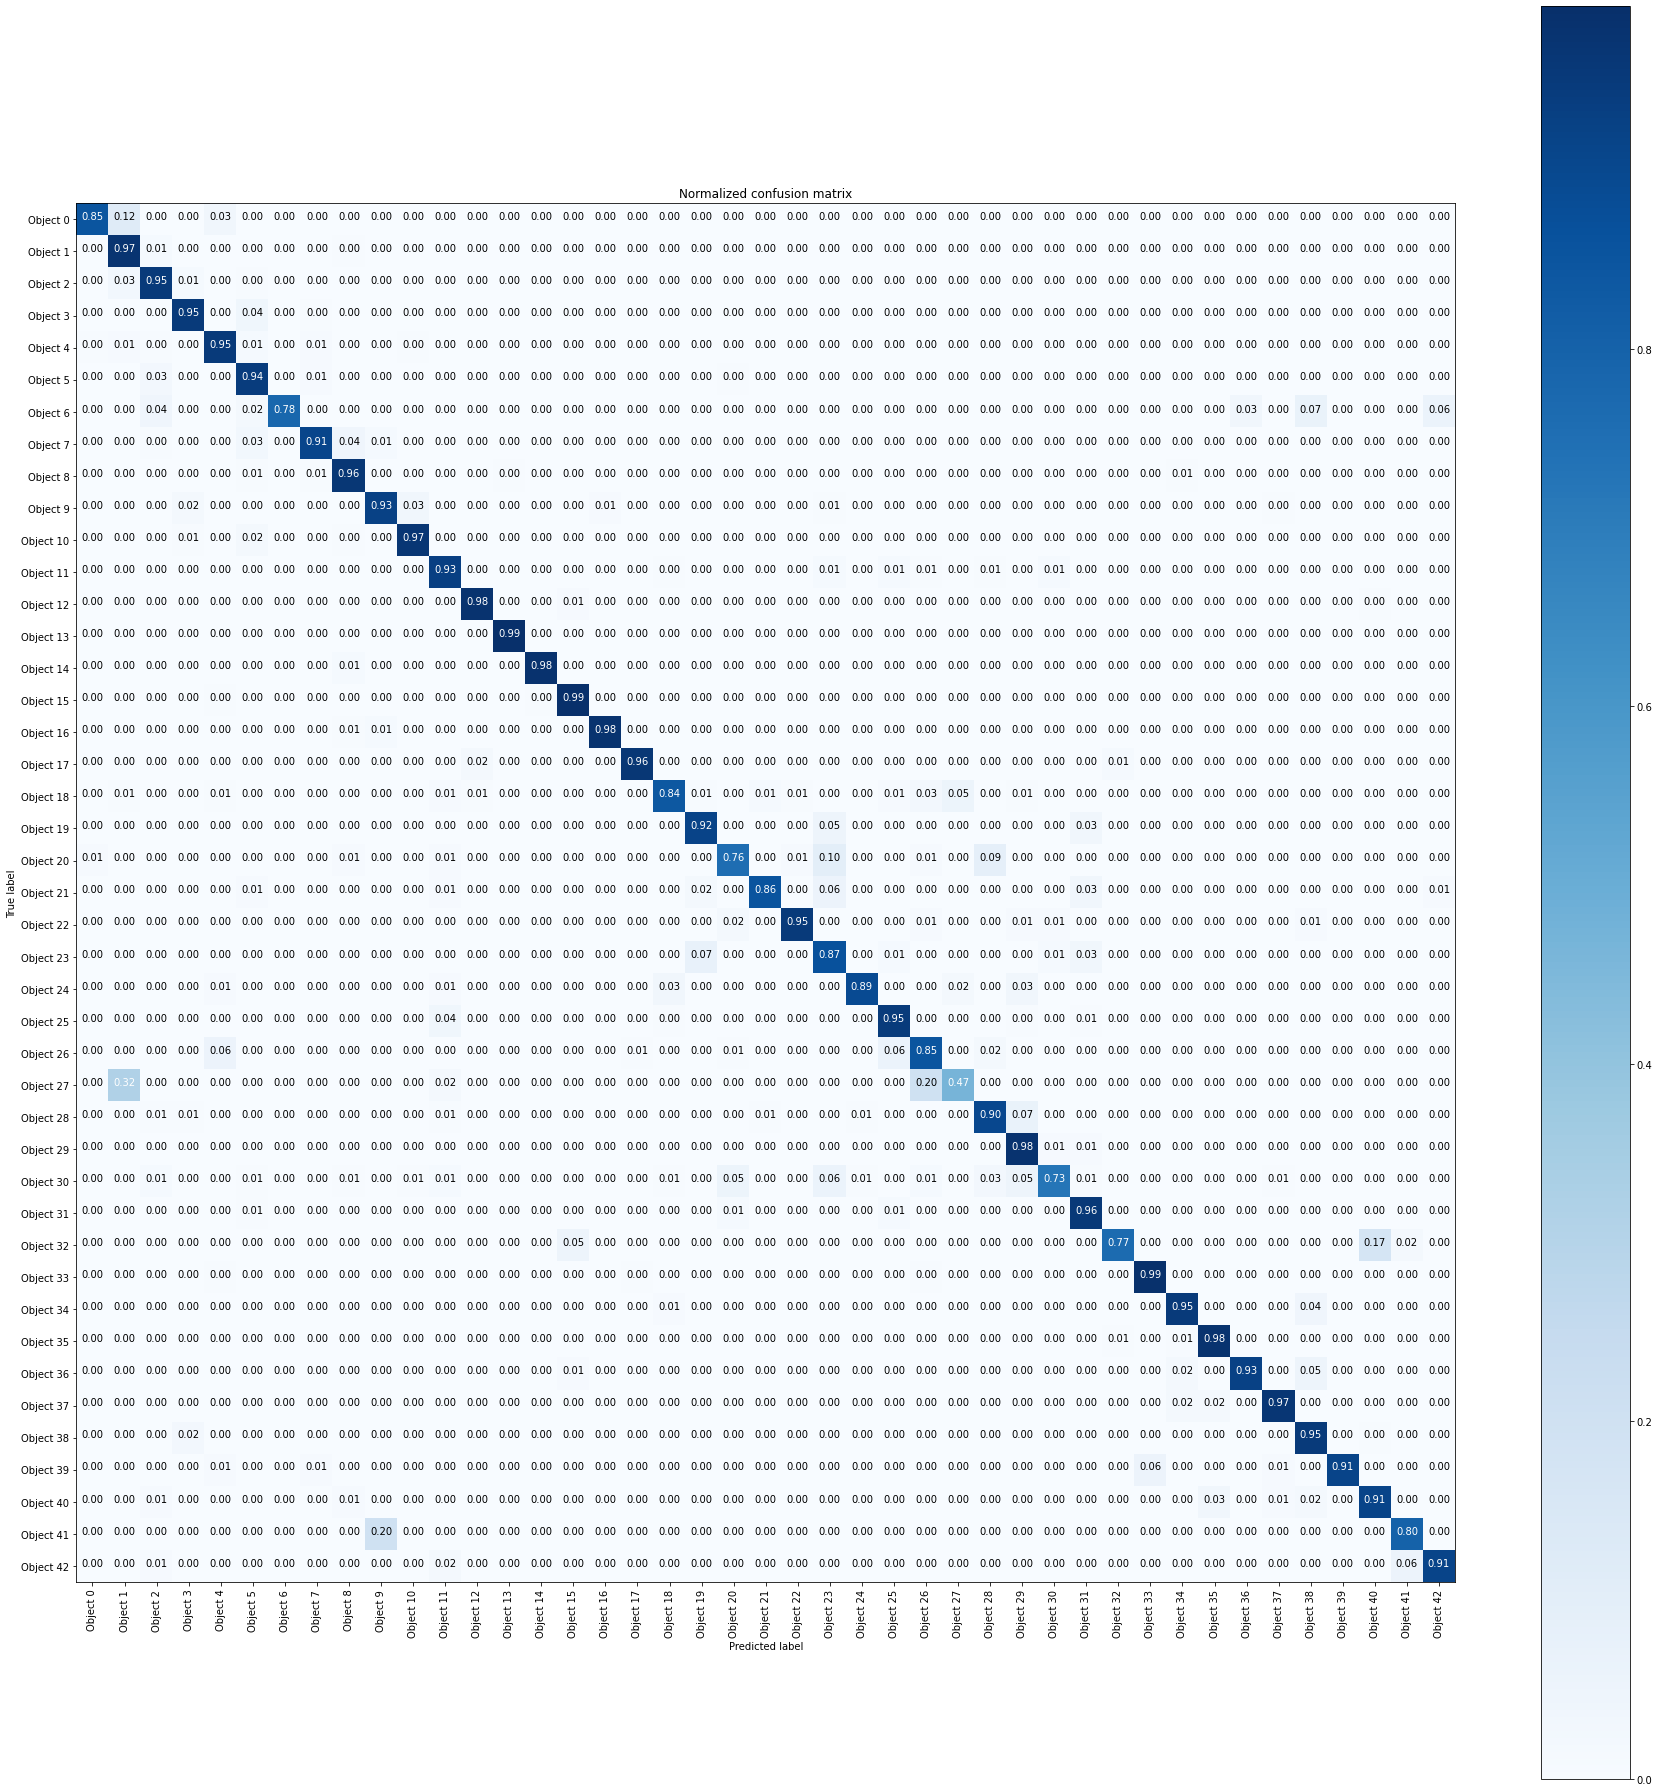

In [ ]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.get_cmap("Blues")):
    Normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    if normalize:
        cm = Normalized
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(Normalized, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        thresh = cm[i].max() / 2.
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plt.figure(figsize=(17,17))
plot_confusion_matrix(confusion, classes=target_names, normalize=False, 
                      title='Confusion matrix, without normalization')
#plt.savefig("/content/drive/My Drive/results/InceptionResNetV2/caltech101/confusion_matrix_without_normalization.png")
plt.show()
plt.figure(figsize=(25,25))
plot_confusion_matrix(confusion, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')
#plt.savefig("/content/drive/My Drive/results/InceptionResNetV2/caltech101/confusion_matrix_with_normalization.png")
plt.show()

# Cropped Images

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,cohen_kappa_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score
classification, confusion, Test_loss, Test_accuracy,kc = reports(X_test,Y_test)
classification = str(classification)
confusion_str = str(confusion)

11/11 [==============================] - 0s 2ms/step - loss: 2.3090 - accuracy: 0.6899


In [ ]:
print("confusion matrix: ")
print('{}'.format(confusion_str))
print("KAppa Coeefecient=",kc)
print('Test loss {} (%)'.format(Test_loss))
print('Test accuracy {} (%)'.format(Test_accuracy))
print(classification)

confusion matrix: 
[[ 1  2  1 ...  0  0  0]
 [ 1  9  1 ...  0  0  0]
 [ 0  7 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  1]]
KAppa Coeefecient= 0.6783370947082248
Test loss 230.89981079101562 (%)
Test accuracy 68.98550987243652 (%)
              precision    recall  f1-score   support

    Object 0       0.33      0.20      0.25         5
    Object 1       0.41      0.64      0.50        14
    Object 2       0.71      0.57      0.63        21
    Object 3       0.60      0.75      0.67         8
    Object 4       0.77      0.62      0.69        16
    Object 5       0.78      0.64      0.70        11
    Object 6       0.71      0.71      0.71         7
    Object 7       0.89      0.53      0.67        15
    Object 8       0.58      0.64      0.61        11
    Object 9       0.60      0.75      0.67         8
   Object 10       0.86      0.90      0.88        21
   Object 11       0.36      0.50      0.42        10
   Object 12   

In [ ]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.get_cmap("Blues")):
    Normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    if normalize:
        cm = Normalized
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(Normalized, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        thresh = cm[i].max() / 2.
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plt.figure(figsize=(17,17))
plot_confusion_matrix(confusion, classes=target_names, normalize=False, 
                      title='Confusion matrix, without normalization')
#plt.savefig("/content/drive/My Drive/results/InceptionResNetV2/caltech101/confusion_matrix_without_normalization.png")
plt.show()
plt.figure(figsize=(25,25))
plot_confusion_matrix(confusion, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')
#plt.savefig("/content/drive/My Drive/results/InceptionResNetV2/caltech101/confusion_matrix_with_normalization.png")
plt.show()

Confusion matrix, without normalization


KeyboardInterrupt: ignored